# PCA

Using the trusty UCI repo and the crime data set http://www.statsci.org/data/general/uscrime.txt data dictionary at http://www.statsci.org/data/general/uscrime.html I will conduct a prinicpal component analysis of the attributes and then deploy a linear regression model.



### Load libraries and set seed



In [1]:
options(jupyter.plot_mimetypes = c("text/plain", "image/png" ))
set.seed(37)



### Load data



In [2]:
data <- read.table('uscrime (2).txt', header = T)
head(data)

M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234
12.1,0,11.0,11.8,11.5,0.547,96.4,25,4.4,0.084,2.9,6890,12.6,0.034201,20.9995,682




### Check str of data



In [3]:
str(data)

'data.frame':	47 obs. of  16 variables:
 $ M     : num  15.1 14.3 14.2 13.6 14.1 12.1 12.7 13.1 15.7 14 ...
 $ So    : int  1 0 1 0 0 0 1 1 1 0 ...
 $ Ed    : num  9.1 11.3 8.9 12.1 12.1 11 11.1 10.9 9 11.8 ...
 $ Po1   : num  5.8 10.3 4.5 14.9 10.9 11.8 8.2 11.5 6.5 7.1 ...
 $ Po2   : num  5.6 9.5 4.4 14.1 10.1 11.5 7.9 10.9 6.2 6.8 ...
 $ LF    : num  0.51 0.583 0.533 0.577 0.591 0.547 0.519 0.542 0.553 0.632 ...
 $ M.F   : num  95 101.2 96.9 99.4 98.5 ...
 $ Pop   : int  33 13 18 157 18 25 4 50 39 7 ...
 $ NW    : num  30.1 10.2 21.9 8 3 4.4 13.9 17.9 28.6 1.5 ...
 $ U1    : num  0.108 0.096 0.094 0.102 0.091 0.084 0.097 0.079 0.081 0.1 ...
 $ U2    : num  4.1 3.6 3.3 3.9 2 2.9 3.8 3.5 2.8 2.4 ...
 $ Wealth: int  3940 5570 3180 6730 5780 6890 6200 4720 4210 5260 ...
 $ Ineq  : num  26.1 19.4 25 16.7 17.4 12.6 16.8 20.6 23.9 17.4 ...
 $ Prob  : num  0.0846 0.0296 0.0834 0.0158 0.0414 ...
 $ Time  : num  26.2 25.3 24.3 29.9 21.3 ...
 $ Crime : int  791 1635 578 1969 1234 682 963 1555 



### Check summary of data



In [4]:
summary(data)

       M               So               Ed             Po1       
 Min.   :11.90   Min.   :0.0000   Min.   : 8.70   Min.   : 4.50  
 1st Qu.:13.00   1st Qu.:0.0000   1st Qu.: 9.75   1st Qu.: 6.25  
 Median :13.60   Median :0.0000   Median :10.80   Median : 7.80  
 Mean   :13.86   Mean   :0.3404   Mean   :10.56   Mean   : 8.50  
 3rd Qu.:14.60   3rd Qu.:1.0000   3rd Qu.:11.45   3rd Qu.:10.45  
 Max.   :17.70   Max.   :1.0000   Max.   :12.20   Max.   :16.60  
      Po2               LF              M.F              Pop        
 Min.   : 4.100   Min.   :0.4800   Min.   : 93.40   Min.   :  3.00  
 1st Qu.: 5.850   1st Qu.:0.5305   1st Qu.: 96.45   1st Qu.: 10.00  
 Median : 7.300   Median :0.5600   Median : 97.70   Median : 25.00  
 Mean   : 8.023   Mean   :0.5612   Mean   : 98.30   Mean   : 36.62  
 3rd Qu.: 9.700   3rd Qu.:0.5930   3rd Qu.: 99.20   3rd Qu.: 41.50  
 Max.   :15.700   Max.   :0.6410   Max.   :107.10   Max.   :168.00  
       NW              U1                U2            



### Calculating PCA Manually

First let's do the PCA transformation manually. Then we will use base package `prcomp`. Before we can do PCA it is important to z-scale the individual features to mean 0 and stdev 1 because each feature is on a different unit scale as evidenced by the summary cell above. For example, Wealth is measured in the thousands while Prob is measured in percentages. Before we do that let's look at the variance of each individual feature.



In [5]:
# reference: http://uc-r.github.io/pca

apply(data, 2, var)

M           So           Ed          Po1          Po2           LF 
1.579454e+00 2.294172e-01 1.251489e+00 8.832174e+00 7.818353e+00 1.633115e-03 
         M.F          Pop           NW           U1           U2       Wealth 
8.683256e+00 1.449415e+03 1.057377e+02 3.250370e-04 7.132562e-01 9.310502e+05 
        Ineq         Prob         Time        Crime 
1.591696e+01 5.169699e-04 5.022408e+01 1.495854e+05



Holy cow that's a lot of variances in our variances!! Further evidence for the need to z-scale the data. Remember that z-scaling the data involves setting the mean to zero and the standard deviation to one. We accomplish this by using the following formula on every element in each column of the input feature data:

$$
z = \frac{\left (x - \mu_{p}   \right )}{\sigma_{p}}
$$

Where z is the scaled value of x and p is the feature being considered. See reference below:

reference: https://gerardnico.com/data_mining/z_scale



In [6]:
# scale input data

scaled_data <- apply(data[-16], 2, scale)
head(scaled_data)

M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time
0.9886930,1.3770536,-1.3085099,-0.9085105,-0.8666988,-1.2667456,-1.12060499,-0.09500679,1.943738564,0.69510600,0.8313680,-1.3616094,1.6793638,1.6497631,-0.05599367
0.3521372,-0.7107373,0.6580587,0.6056737,0.5280852,0.5396568,0.98341752,-0.62033844,0.008483424,0.02950365,0.2393332,0.3276683,0.0000000,-0.7693365,-0.18315796
0.2725678,1.3770536,-1.4872888,-1.3459415,-1.2958632,-0.6976051,-0.47582390,-0.48900552,1.146296747,-0.08143007,-0.1158877,-2.1492481,1.4036474,1.5969416,-0.32416470
-0.2048491,-0.7107373,1.3731746,2.1535064,2.1732150,0.3911854,0.37257228,3.16204944,-0.205464381,0.36230482,0.5945541,1.5298536,-0.6767585,-1.3761895,0.46611085
0.1929983,-0.7107373,1.3731746,0.8075649,0.7426673,0.7376187,0.06714965,-0.48900552,-0.691709391,-0.24783066,-1.6551781,0.5453053,-0.5013026,-0.2503580,-0.74759413
-1.3983912,-0.7107373,0.3898903,1.1104017,1.2433590,-0.3511718,-0.64550313,-0.30513945,-0.555560788,-0.63609870,-0.5895155,1.6956723,-1.7044289,-0.5669349,-0.78996812




Principal Component Analysis is a neat idea when we have potentially thousands of input features in our data. PCA finds a low-dimensional representation of the input data that contains as much of the variation as possible. Each dimension contains a linear combination of the input features. Dimensions are orthogonal to one another and thus *uncorrelated* - this is important because we can boil down an input dataset to fewer features that contain the same amount of information as the input set. This is very advantageous in applications where our feature matrices can become very sparse like in text analytics. Our first principal component is of the form:

$$
Z_{1} = \phi_{11} X_{1} +  \phi_{21} X_{2} +  \phi_{p1} X_{p}
$$

By design our first principal component will contain the most variance. The phi coefficients are called the *loadings* of the principal component. Our second principal component is of the form:

$$
Z_{2} = \phi_{12} X_{1} +  \phi_{22} X_{2} +  \phi_{p2} X_{p}
$$

And on and on until all variance in our input dataset is accounted for. Remember that consecutive components are orthogonal to one another and thus uncorrelated. Now that we have the theory down, lets begin by calculating the eigenvalues and eigenvectors of our scaled input data. First we must find the covariance matrix.



In [7]:
# covariance matrix

data_cov <- cov(scaled_data)

# eigenvalues and eigenvectors

data_eigen <- eigen(data_cov)
str(data_eigen)

List of 2
 $ values : num [1:15] 6.019 2.802 2.005 1.162 0.958 ...
 $ vectors: num [1:15, 1:15] -0.304 -0.331 0.34 0.309 0.311 ...
 - attr(*, "class")= chr "eigen"


In [8]:
data_eigenvalues <- data_eigen$values
data_eigenvectors <- data_eigen$vectors



Now that we have our eigenvalues and eigenvectors, lets extract the loadings for each feature in our dataset. R by default calculates eigenvectors that point in the negative direction - to skirt this let's multiply the eigenvectors by -1. We'll limit it to the first two principal components.



In [9]:
loadings <- -1*data_eigenvectors[,1:2]
row.names(loadings) <- colnames(data[-16])
colnames(loadings) <- c("PC1","PC2")
loadings

,PC1,PC2
M,0.30371194,-0.06280357
So,0.33088129,0.15837219
Ed,-0.33962148,-0.21461152
Po1,-0.30863412,0.26981761
Po2,-0.31099285,0.26396300
LF,-0.17617757,-0.31943042
M.F,-0.11638221,-0.39434428
Pop,-0.11307836,0.46723456
NW,0.29358647,0.22801119
U1,-0.04050137,-0.00807439




Reading the values in PC1 and PC2 top to bottom, we can infer that PC1 roughly corresponds to:
* rate of income inequality *Ineq*
* a states position in the South *So*
* percentage of males aged 14-24 *M*

PC2 roughly corresponds to:
* state population in 1960 in hundred thousands *Pop*
* average time in months served by offenders in state prisons before their first release *Time*
* unemployment rate of urban males 35–39 *U2*





### Proportion of Variance Explained

Ok so now we have a way of extracting principal components, but *how many* principal components should we extract? There are a few different selection criteria we may use, but the most common way is to determine how much variance we want our principal components to account for. We can figure this out by deciding how much variance our principal components capture in the input data set. This is done by calculating the proportion of variance explained (PVE):

$$
PVE = \frac{\sum_{i=1}^{n} \left ( \sum_{j=1}^{p} \phi_{jm}X_{ij}\right )^{2}}{\sum_{j=1}^{p}\sum_{i=1}^{n}x_{ij}^{2}}
$$

Believe it or not this is rather trivial! We just divide each eigenvalue by the sum of our eigenvalues.



In [10]:
PVE <- round(data_eigenvalues / sum(data_eigenvalues), 2)
PVE

[1] 0.40 0.19 0.13 0.08 0.06 0.04 0.02 0.02 0.02 0.01 0.01 0.01 0.00 0.00 0.00



Now let's write a little function to define the percent of variance we want explained by our model. Common values for PVE are 0.8 and 0.9. We'll use 0.9 for this model.



In [11]:
percent_variance_explained_pca <- function(PVEs, desired_PVE){
    PVE <- 0
    number_of_PCs_to_use <- 0
    while (PVE < desired_PVE) {
        number_of_PCs_to_use <- number_of_PCs_to_use+1
        PVE <- sum(PVEs[1:number_of_PCs_to_use])
    }
    return(PVEs[1:number_of_PCs_to_use])
}

In [12]:
# Our first six PCs explain 90% of the variance

percent_variance_explained_pca(PVE, 0.9)

[1] 0.40 0.19 0.13 0.08 0.06 0.04

In [13]:
# check

sum(percent_variance_explained_pca(PVE, 0.9))

[1] 0.9



There you have it! We have successfully done PCA the manual, hard way. Up next we will do it with the `prcomp` library, then we will use the PCs to make a prediction for the crime rate.





### Using base R function `prcomp`

Next let's do the Principal Component Analysis (PCA) with the base R function `prcomp`.



In [14]:
help(prcomp)

In [15]:
pca <- prcomp(data[-16], scale = TRUE)



Remember, variance is just standard deviation squared.



In [16]:
pca_variances <- pca$sdev^2
pca_variances

[1] 6.018952657 2.801847026 2.004944334 1.162207801 0.958298972 0.553193900
 [7] 0.321818687 0.307401270 0.235155292 0.199880931 0.175685403 0.128190107
[13] 0.069341691 0.058467765 0.004614165

In [17]:
# sum of variances - 15 features * 1 = 15 due to z-scaling

sum_of_pca_variances <- sum(pca$sdev^2)
sum_of_pca_variances

[1] 15



So what is this mysterious `pca sdev^2` value that we are calling the pca_variance? None other then the eigenvalues of our z-scaled covariance matrix! See below for proof:

***Note:*** Due to floating point rounding error, I rounded the values to the 12th decimal point before doing the comparison, but for all intensive purposes they're equal (as evidenced by the comparison between the sum of variances and the sum of the eigenvalues below).



In [18]:
round(data_eigenvalues,12) == round(pca_variances,12)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [19]:
round(sum_of_pca_variances, 12) == round(sum(data_eigenvalues), 12)

[1] TRUE



Our percentage of variance explained function is identical to the one we did manually above. No surprise it yields us the exact same results.



In [20]:
# plotting percentage of variances explained by each principal component

percent_variance_pcas <- round(pca_variances/sum_of_pca_variances,2)
percent_variance_pcas

[1] 0.40 0.19 0.13 0.08 0.06 0.04 0.02 0.02 0.02 0.01 0.01 0.01 0.00 0.00 0.00



### Scree Plot

Let's plot the Scree plot of the PVE vs Principal Component and the Cumulative PVE vs Principal Component side-by-side. For more information on the Scree plot see awesome reference below:

reference: http://www.improvedoutcomes.com/docs/WebSiteDocs/PCA/Creating_a_Scree_Plot.htm



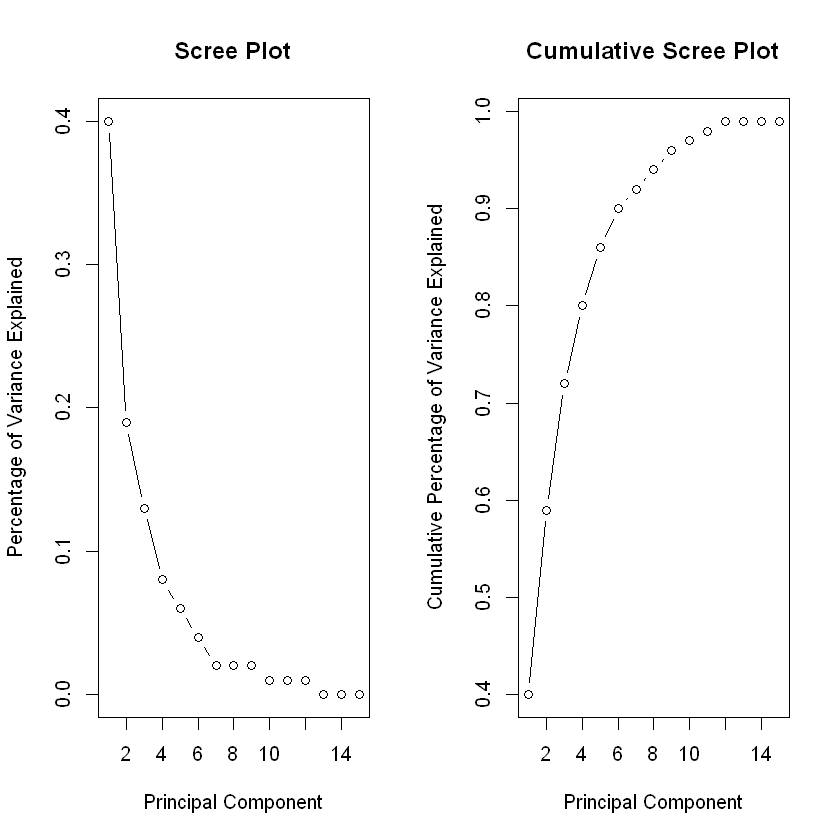

In [21]:
par(mfrow=c(1,2))

plot(percent_variance_pcas,
     type='b',
     main="Scree Plot", 
     xlab="Principal Component",
     ylab="Percentage of Variance Explained")

plot(cumsum(percent_variance_pcas),
     type='b',
     main="Cumulative Scree Plot", 
     xlab="Principal Component",
     ylab="Cumulative Percentage of Variance Explained")



The Scree plot above is plotting the variance (standard deviation squared) vs the principal component. An easier way to create the Scree plot is just to plot the pca object returned by the `prcomp` function (see plot below). I prefer our manual way because we can see the cumulative variance represented by the addition of each principal component. This gives us a quick visual cue to aid in deciding how much variance we want explained by our principal components. Common values are 0.8 or 0.9 as mentioned above. In addition to the base Scree Plot, I have added the variance cutoff point of one defined by Kaiser. Acording to Kaiser, any principal component whose variance is greater than one, we include in our model. This provides slightly different results than using PVE as feature selection criteria (Kaiser would use 4 PCs compared to 6 PCs determined by PVE). Feature selection criteria is a massive topic in-of-itself, but these two are common techniques. Like all things in analytics, the given context should determine the technique. See reference below for more details:

reference: http://www.real-statistics.com/multivariate-statistics/factor-analysis/determining-number-of-factors/


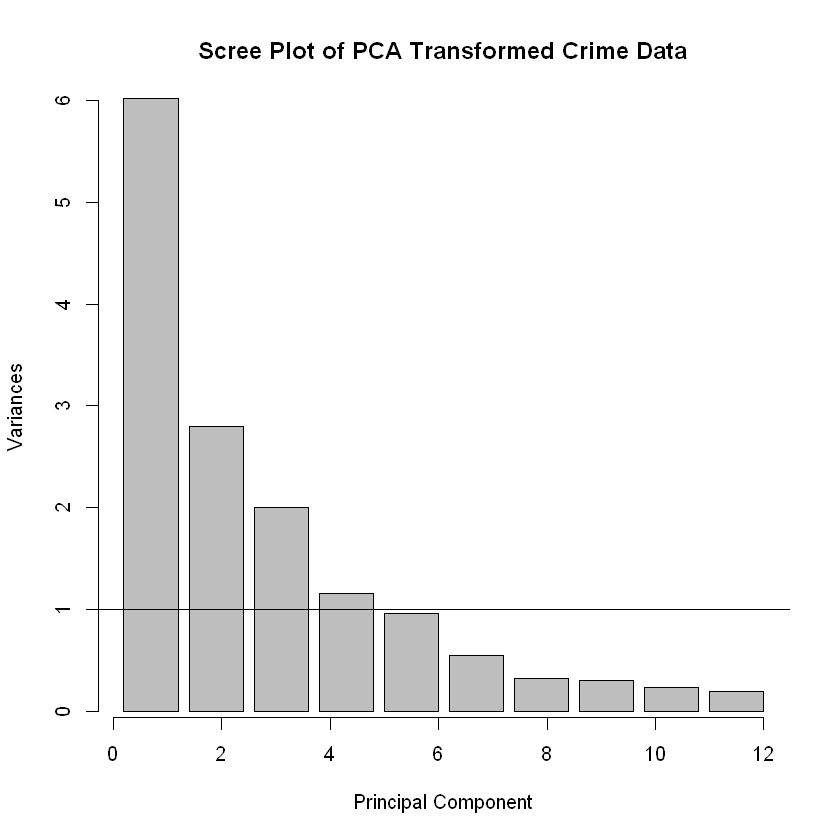

In [22]:
plot(pca,
     main="Scree Plot of PCA Transformed Crime Data", 
     xlab="Principal Component")
abline(h=1)
axis(1)



Now that we have beat PCA to death, lets use the principal components to make a prediction for Crime! I will perform the linear regression using the PVE approach.





### Linear regression using PVE feature selection criteria

Let's use 6 PCs and create a dataframe with our PCs as features and Crime as our target variable.



In [23]:
data_pca_6_PCs <- as.data.frame(cbind(pca$x[,1:6], data[16]))



### Linear regression



In [24]:
pca_6_PCs_regression_model <- lm(Crime~., data = data_pca_6_PCs)
summary(pca_6_PCs_regression_model)


Call:
lm(formula = Crime ~ ., data = data_pca_6_PCs)

Residuals:
    Min      1Q  Median      3Q     Max 
-377.15 -172.23   25.81  132.10  480.38 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   905.09      35.35  25.604  < 2e-16 ***
PC1            65.22      14.56   4.478 6.14e-05 ***
PC2           -70.08      21.35  -3.283  0.00214 ** 
PC3            25.19      25.23   0.998  0.32409    
PC4            69.45      33.14   2.095  0.04252 *  
PC5          -229.04      36.50  -6.275 1.94e-07 ***
PC6           -60.21      48.04  -1.253  0.21734    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 242.3 on 40 degrees of freedom
Multiple R-squared:  0.6586,	Adjusted R-squared:  0.6074 
F-statistic: 12.86 on 6 and 40 DF,  p-value: 4.869e-08


In [25]:
# model fit

summary(pca_6_PCs_regression_model)$adj.r.squared

[1] 0.6073927

In [26]:
# Coefficients for 6 PCs linear regression model

pca_6_PCs_regression_model_intercept <- pca_6_PCs_regression_model$coefficients[1]
pca_6_PCs_regression_model_intercept

(Intercept) 
   905.0851

In [27]:
pca_6_PCs_regression_model_coeffs <- pca_6_PCs_regression_model$coefficients[-1]
pca_6_PCs_regression_model_coeffs

PC1        PC2        PC3        PC4        PC5        PC6 
  65.21593  -70.08312   25.19408   69.44603 -229.04282  -60.21329



Having the coefficients for our principal components does not do us much good. Let's convert the principal components back to the original input features.



In [28]:
pca_6_PCs_regression_model_alphas <- pca$rotation[,1:6] %*% 
                                     pca_6_PCs_regression_model_coeffs
t(pca_6_PCs_regression_model_alphas)

M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time
87.83811,43.89972,20.46387,123.1119,118.6478,45.8933,112.6126,25.93763,94.98769,1.819916,29.44592,45.24734,5.724056,-51.7129,36.12882




The alpha values shown above are *scaled* features (z) by default. We must undo the z-scaling done by the `prcomp` function.

In [29]:
pca_6_PCs_regression_model_unscaled_intercept <-
    pca_6_PCs_regression_model_intercept - 
        sum(pca_6_PCs_regression_model_alphas*
                sapply(data[-16],mean)/sapply(data[-16],sd))

pca_6_PCs_regression_model_input_alphas <- 
    pca_6_PCs_regression_model_alphas/sapply(data[-16],sd)

In [30]:
# unscaled intercept

t(pca_6_PCs_regression_model_unscaled_intercept)

(Intercept)
-5923.647


In [31]:
# unscaled alpha values

t(pca_6_PCs_regression_model_input_alphas)

M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time
69.89232,91.65344,18.29254,41.42536,42.43282,1135.641,38.21603,0.681293,9.237458,100.945,34.86602,0.04689284,1.434742,-2274.397,5.097975




### Crime estimates using 6 PCs

Now that we have unscaled values for alpha and a model intercept, let's evaluate our model performance!



In [32]:
pca_6_PCs_regression_model_estimates <- (as.matrix(data[-16]) %*% 
    pca_6_PCs_regression_model_input_alphas) + 
        pca_6_PCs_regression_model_unscaled_intercept



### Model R^2 and Adjusted R^2 Values



In [33]:
pca_6_PCs_regression_model_SSE <- 
    sum((pca_6_PCs_regression_model_estimates - data[,16])^2)

pca_6_PCs_regression_model_SStot <- sum((data[,16] - mean(data[,16]))^2)

cat('Multiple R-Squared: ')
cat(1 - pca_6_PCs_regression_model_SSE/pca_6_PCs_regression_model_SStot)

Multiple R-Squared: 0.6586023

In [34]:
pca_6_PCs_regression_model_R2 <-
    1 - pca_6_PCs_regression_model_SSE/pca_6_PCs_regression_model_SStot

cat('Adjusted R-Squared: ')
cat(pca_6_PCs_regression_model_R2 - 
    (1 - pca_6_PCs_regression_model_R2)*6/(nrow(data)-6-1))

Adjusted R-Squared: 0.6073927



Notice how our R^2 values for the linear regression model built with the PCs matches the R^2 value for the model built using the unscaled features - this is a good thing and confirms that we have successfully reversed our PCs to the original features. Now let's use a test point and make a prediction for crime!





### Crime prediction on test point



In [35]:
# test set
test <- data.frame(M = 14.0,
                   So = 0,
                   Ed = 10.0,
                   Po1 = 12.0,
                   Po2 = 15.5,
                   LF = 0.640,
                   M.F = 94.0,
                   Pop = 150,
                   NW = 1.1,
                   U1 = 0.120,
                   U2 = 3.6,
                   Wealth = 3200,
                   Ineq = 20.1,
                   Prob = 0.04,
                   Time = 39.0)
test

M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time
14,0,10,12,15.5,0.64,94,150,1.1,0.12,3.6,3200,20.1,0.04,39


In [36]:
test_point_estimate <- (as.matrix(test) %*% 
    pca_6_PCs_regression_model_input_alphas) + 
        pca_6_PCs_regression_model_unscaled_intercept

cat("Test data Crime rate estimate: ")
cat(test_point_estimate)

Test data Crime rate estimate: 1248.427



### Fin!

Our test point estimate passes the sanity check as it is in the ballpark of reasonable.